In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import re


In [3]:
df = pd.read_csv('/Users/abhishekmishra/Downloads/Datasets/bbc-news-data.csv', sep="\t")
df.head(3)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...


In [13]:
print(df.shape)
df = df[(~df.title.isnull() & (~df.content.isnull()))]
print(df.head(2))
print(df.shape)


(2225, 4)
   category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
(2225, 4)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtitle'

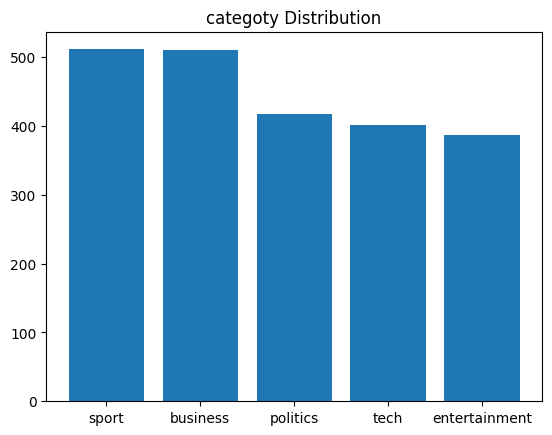

In [17]:
plt.bar(df.category.value_counts().index, df.category.value_counts().values)
plt.title('categoty Distribution')
plt.xtitle('Category')
plt.ytitle('Count')

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, InputLayer, Input, RNN, SimpleRNN, LSTM, GRU, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def data_cleaning(text):

    # Lower the words in the sentence
    cleaned = text.lower()

    # Replace the full stop with a full stop and space
    cleaned = cleaned.replace(".", ". ")

    # Remove the stop words : optional pre-processing step
    tokens = [word for word in cleaned.split() if not word in stop_words]

    # Remove the punctuations
    tokens = [tok.translate(str.maketrans(' ', ' ', string.punctuation)) for tok in tokens]

    # Joining the tokens back to form the sentence
    cleaned = " ".join(tokens)

    # Remove any extra spaces
    cleaned = cleaned.strip()

    return cleaned


In [34]:
for index, data in tqdm(df.iterrows(), total=df.shape[0]):
    df.loc[index, 'title'] = data_cleaning(data['title'])


100%|██████████| 2225/2225 [00:00<00:00, 21487.02it/s]


<Axes: ylabel='title'>

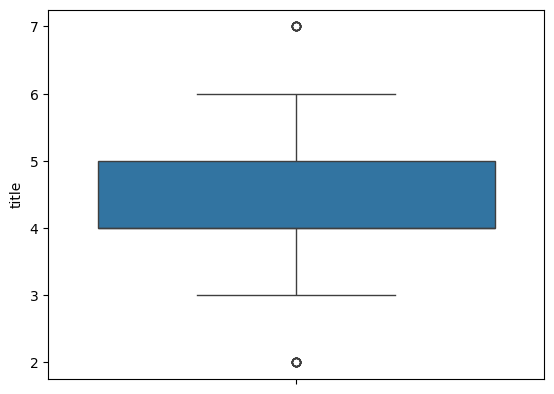

In [35]:
#Fixing the sequnece length
sns.boxplot(df['title'].str.split(" ").str.len())

In [40]:
max_sentence_len = df['title'].str.split(" ").str.len().max()
total_classes = df.category.nunique()
print(f"Maximum sequence length: {max_sentence_len}")
print(f"Total classes: {total_classes}")

Maximum sequence length: 7
Total classes: 5


In [41]:
np.random.seed(100)
train_X, test_X, train_Y, test_Y = train_test_split(df['title'], df['category'], test_size=0.2, random_state=100)
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)

In [46]:
train_X.shape,test_X.shape,train_Y.shape, test_Y.shape

((1780,), (445,), (1780,), (445,))

In [47]:
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values

In [49]:
validation = test_Y.argmax(axis=1)

In [52]:
def tokenize_and_pad(inp_text, max_len, tok):

    text_seq = tok.texts_to_sequences(inp_text)
    text_seq = pad_sequences(text_seq, maxlen=max_len, padding='post')

    return text_seq

text_tok = Tokenizer()
text_tok.fit_on_texts(train_X)
train_text_X = tokenize_and_pad(inp_text=train_X, max_len=max_sentence_len, tok=text_tok)
test_text_X = tokenize_and_pad(inp_text=test_X, max_len=max_sentence_len, tok=text_tok)
vocab_size = len(text_tok.word_index)+1

print("Overall text vocab size", vocab_size)

Overall text vocab size 3360


In [53]:
#Latent Dimensiona and Embedding dimension
latent_dim=50
embedding_dim=100